In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [14]:
amz=pd.read_csv('C:/Users/jesus/Downloads/archive (2)/amz_uk_price_prediction_dataset.csv')
amz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

The top categories in which being a best seller (True) is more prevalent than False are: Grocery, Smart Home Security & Lighting and Health & Personal Care as shown in the table bellow.

In [15]:
crosstab=pd.crosstab(index=amz['category'], columns=amz['isBestSeller'])
crosstab_prop=pd.crosstab(index=amz['category'], columns=amz['isBestSeller'],normalize='index')
top_cat_best_seller=crosstab_prop[True].sort_values(ascending=False).head(5)
top_cat_best_seller

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Name: True, dtype: float64

In [16]:
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


<Axes: ylabel='category'>

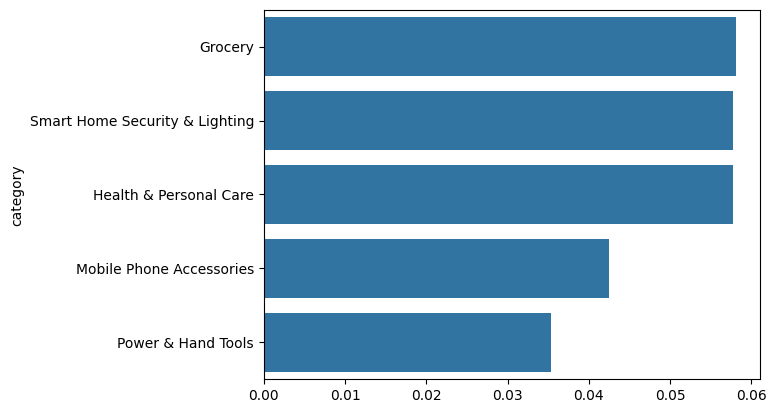

In [17]:
sns.barplot(x=top_cat_best_seller.values, y=top_cat_best_seller.index)

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Based on the bellow analysis product category and best-seller status are definitely not independent. There is a statistically significant relationship between them.

In [18]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(np.float64(36540.20270061387), np.float64(0.0))

In [19]:
association(crosstab, method="cramer")

0.1222829439760564

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

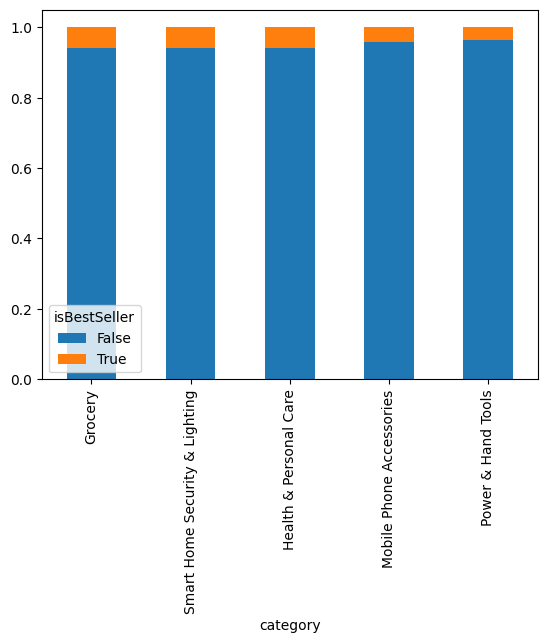

In [20]:
filtered_crosstab = crosstab_prop.sort_values(by=True, ascending=False).head(5)
filtered_crosstab.plot(kind="bar", stacked=True)

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [21]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

data_series = amz['price'] 
outliers = tukeys_test_outliers(data_series)
amz.iloc[~outliers.index,:]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

Which product category tends to have the highest median price? Don't filter here by top categories.

The highest median price is Laptops with 1042.725 as the highest median price.

In [22]:
top_20=amz['category'].value_counts().head(20)
top_cat=amz[amz['category'].isin(top_20.index)]
top_cat

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [23]:
# sns.violinplot(data=top_cat, x='category', 
#                y='price', palette="coolwarm", hue='price', legend=False)

In [24]:
amz.groupby("category")['price'].agg(['median'])

,median
category,
3D Printers,319.00
3D Printing & Scanning,36.86
Abrasive & Finishing Products,10.49
Action Cameras,60.77
Adapters,7.05
...,...
Wind Instruments,126.79
Window Treatments,17.99
Women,16.49


Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

Which product category commands the highest average price? Don't filter here by top categories.

In this case the top categories in terms of price median are Sports & Outdoors, Fragrances and Birthday Gifts. As shown in the visuals bellow.

<Axes: xlabel='median', ylabel='category'>

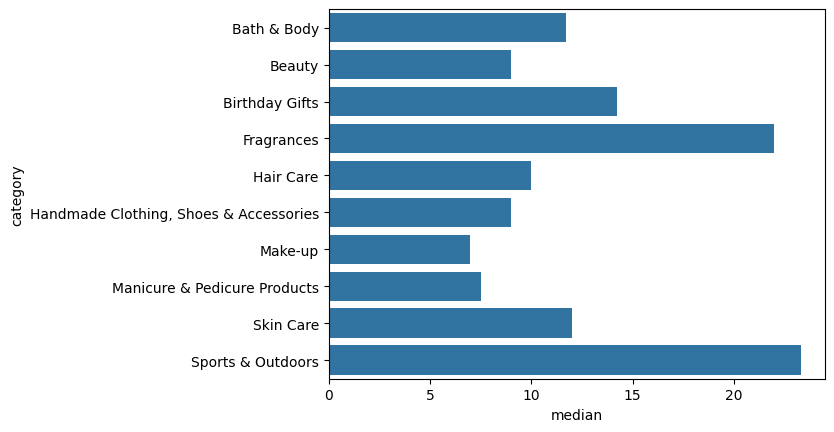

In [25]:
top_10=amz['category'].value_counts().head(10)
top_10_cat=amz[amz['category'].isin(top_10.index)]
median=top_10_cat.groupby('category')['price'].agg(["median"])

sns.barplot(y=median.index, x=median['median'])

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

The 4 cateegories with the top stars are Skin Care, Hair Care, Beauty and Bath & Body. All of them with a 4.4 rating and median.

<Axes: xlabel='stars', ylabel='category'>

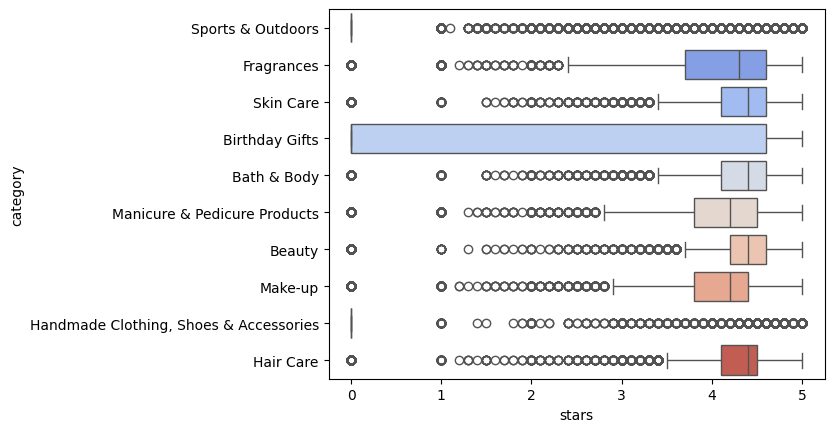

In [26]:
sns.boxplot(data=top_10_cat, y='category', x='stars', palette="coolwarm", hue='category', legend=False)

In [27]:
top_10_cat.groupby('category')['stars'].agg(["median"])

,median
category,
Bath & Body,4.4
Beauty,4.4
Birthday Gifts,0.0
Fragrances,4.3
Hair Care,4.4
"Handmade Clothing, Shoes & Accessories",0.0
Make-up,4.2
Manicure & Pedicure Products,4.2
Skin Care,4.4


## Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.

Is there a significant correlation between product price and its rating?

A correlation of -0.1249 represents a very weak negative linear correlation. Also, since the correlation is negative it means that the move in opposite directions. Meaning that if and increase in the price means a decrease in the stars and vice-versa

In [28]:
amz.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [30]:
correlation = amz['stars'].corr(amz['price'])
correlation

np.float64(-0.12490673262148384)

# Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='stars', ylabel='price'>

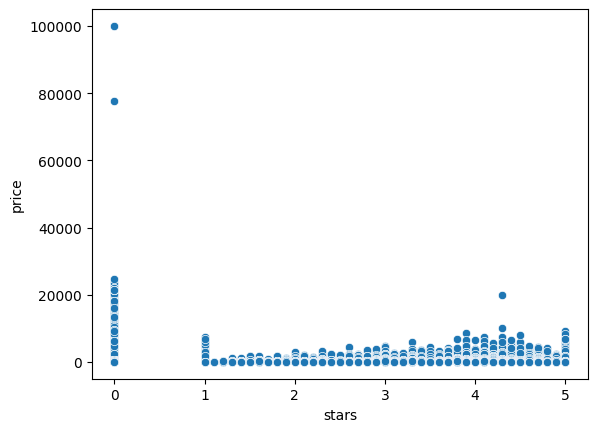

In [31]:
sns.scatterplot(data=amz, x='stars', y='price')